# MDS作業三

### 經濟四B09303047 林奕霆


### 第一題

(a) Data summary and data science structure

Data Science Framework:  
**1. Define the Problem:**  
Our problem in this data set is to use 27 indicators, which can approximately describe the geometric shape of the defect and its outline, to classify the plates' demages type.


In [201]:
# 讀取檔案並轉呈dataframe格式
import pandas as pd

file_path = 'MDS_Assignment3_Steelplates.xlsx'

# 讀入 Excel 檔案
xl = pd.ExcelFile(file_path)
column_names = xl.parse(xl.sheet_names[0], header=None).iloc[:, 0].tolist()
data = xl.parse(xl.sheet_names[1])

# 將第一個 tab 的第一個 column 設定為變數名稱
data.columns = column_names
df = pd.DataFrame(data)
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
1,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
2,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
3,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
4,430,441,100250,100337,630,20,87,62357,64,127,...,0.8736,-0.2267,0.9874,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1936,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1937,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1938,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


**2.Data Acquisition:**  
Identify and collect relevant data sources.  
Consider data quality, completeness, and potential biases by showing the data summary as below.  

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64


No missing value

In [23]:
data_summary = {
    "Count of Plates": df.shape[0],
    "Number of Variables": df.shape[1],
    "Input Vector Indicators": len(df.columns) - 7,  # Exclude the target variable
}

print("Data Summary:")
for key, value in data_summary.items():
    print(f"{key}: {value}")


Data Summary:
Count of Plates: 1940
Number of Variables: 34
Input Vector Indicators: 27


**3.Exploratory Data Analysis (EDA):**  
Explore and visualize the dataset to gain insights and understand data distributions.

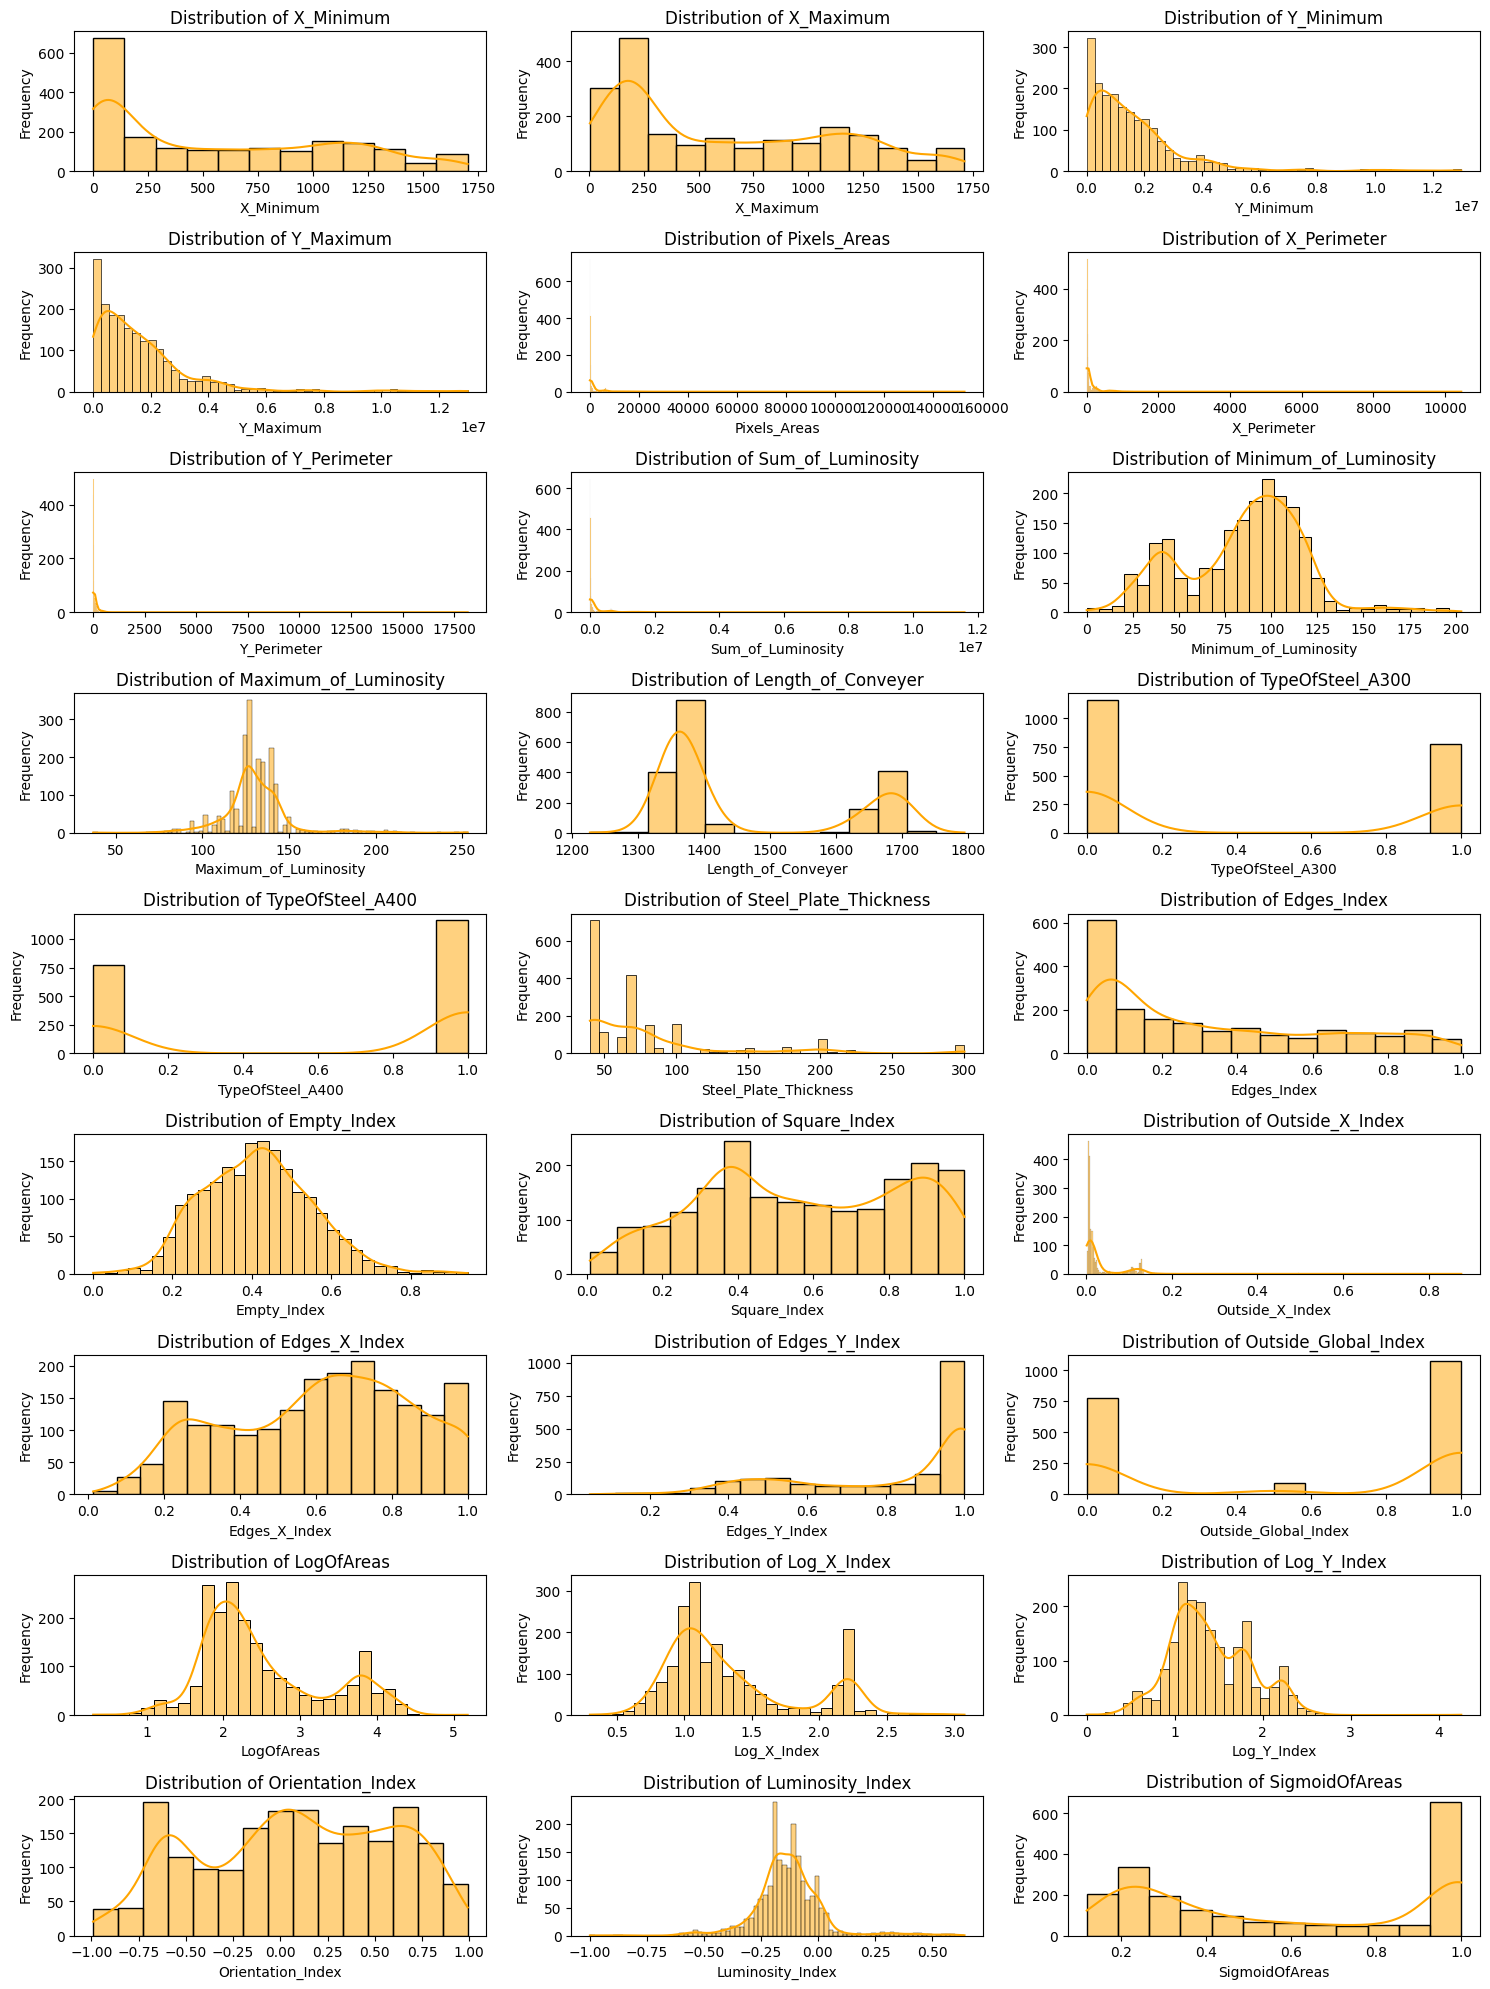

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
indicator_columns = df.iloc[:, :27]

# Set the number of rows and columns for subplots
num_rows = 9  # You can adjust this based on the number of indicators
num_cols = 3  # You can adjust this based on the number of indicators

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot the distribution of each indicator
for i, column in enumerate(indicator_columns.columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i], color='orange')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()


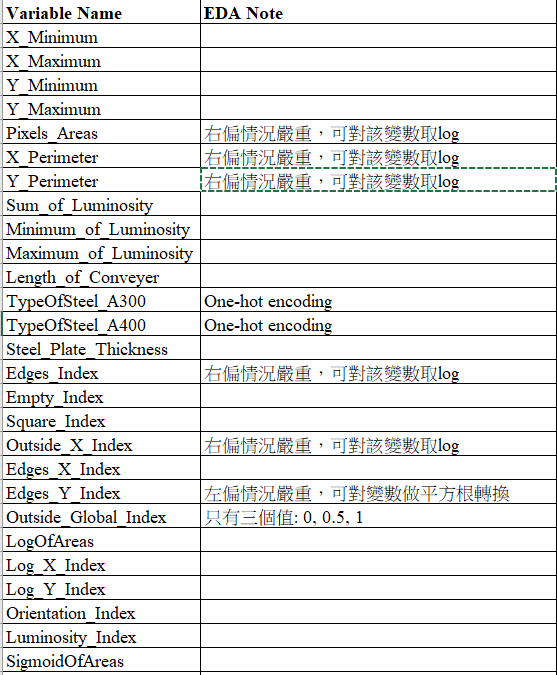

In [28]:
from IPython.display import Image
Image(filename="螢幕擷取畫面 2023-11-11 150335.png",width=400,height=400)

In [32]:
classification_columns = df.iloc[:, 27:34]
# Output the number of occurrences for each classification
classification_counts = classification_columns.sum()
print("Classification Counts:")
print(classification_counts)

Classification Counts:
Pastry          157
Z_Scratch       190
K_Scatch        391
Stains           72
Dirtiness        55
Bumps           402
Other_Faults    673
dtype: int64


**4.Data Preprocessing:**  
Clean and preprocess the data by addressing missing values, outliers, and standardize formats.  
Transform variables, handle categorical data, and scale features.  
**5.Feature Engineering:**  
Create new features to enhance model performance.  
Select and prioritize relevant features based on domain knowledge and correlation analysis.  
**6.Model Selection and Training:**  
Choose appropriate machine learning models.  
Split the data into training and testing sets.  
Train models on the training set using suitable algorithms.  
**7.Model Evaluation:**  
Evaluate model performance using metrics appropriate for the problem.  
Validate the model on a testing set to assess generalization.  
Consider cross-validation for robust performance assessment.

The above 4 steps will be shown in the following questions.

(b)

In [34]:
# Check for identical columns
identical_columns = df.columns[df.columns.duplicated()]
if len(identical_columns) > 0:
    print("Identical Columns:", identical_columns)
else:
    print("No Identical Columns")
# Check for missing values
missing_values = df.isnull().sum()
if missing_values.any():
    print("Missing Values:")
    print(missing_values)
else:
    print("No Missing Values")


No Identical Columns
No Missing Values


Though there's no identical column, if we face the identical column issues, we can solve it by keeping one column and drop the other identical column.  
Though there's no missing value, if we face the missing value issues, we can solve it by using the median or mean value or k-means to fill the missing value.  


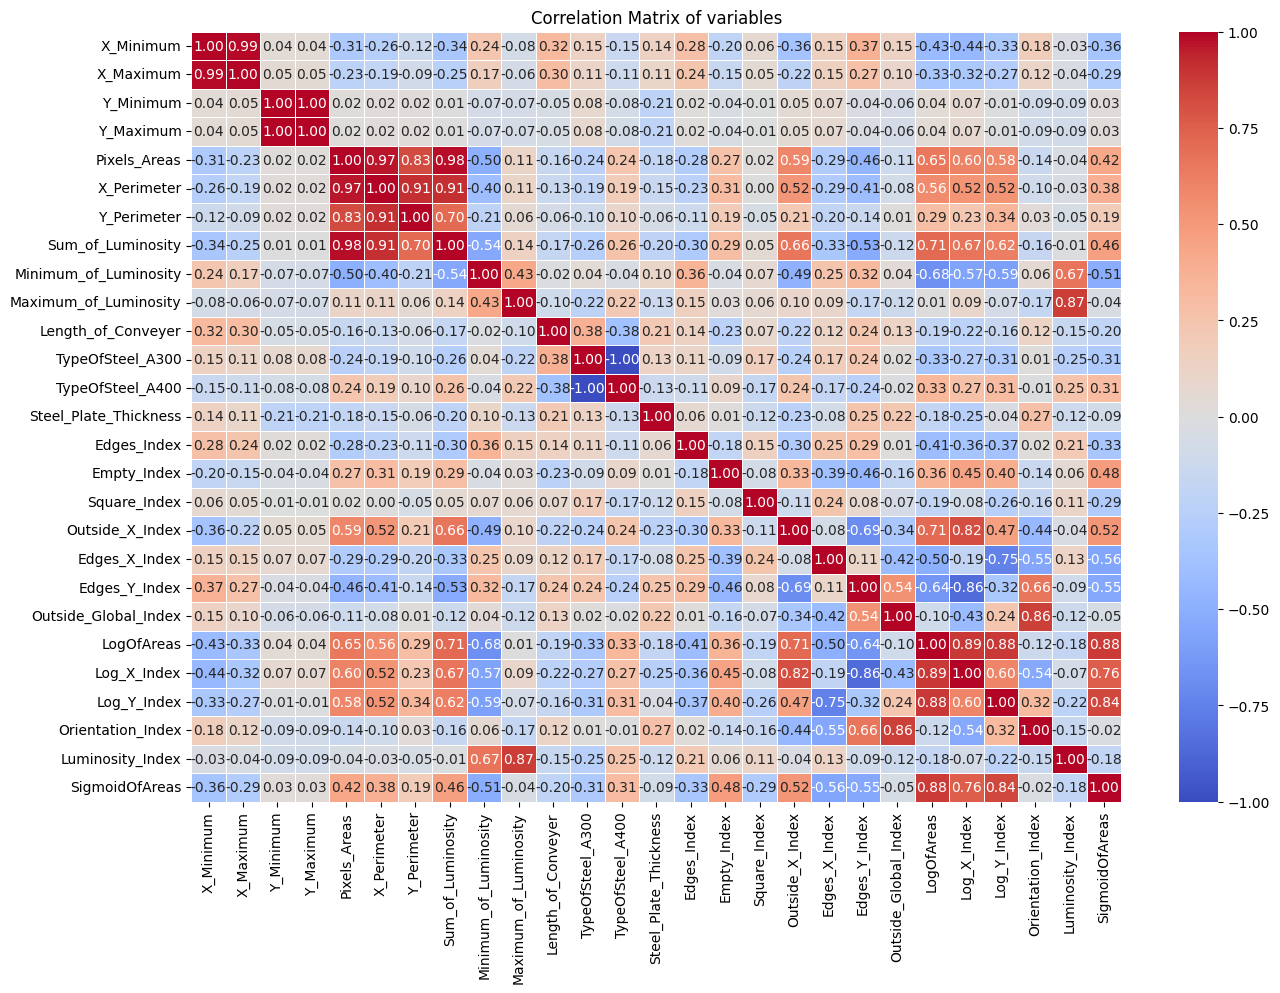

In [36]:
# Check for redundant value

selected_columns = df.iloc[:, :27]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of variables')
plt.show()


Under the threshold of 0.95 correlation,  X_minimum and X_maximum, Y_minimum and Y_maximum, Pixels_Area and X_Perimeters, Pixels_Area and Sum_of_Luminosity, TypeOfSteel_A300 and TypeOfSteel_A400 are highly correlated, and can be the redundant columns in this dataset.  
We can handle these issues by drop X_minimum, Y_minimum, Pixels_Area, TypeOfSteel_A300 and keep the other indicators in the dataset.

In [202]:
# Create df2 from columns 28 to 34 of df
df2 = df.iloc[:, 27:34].copy()
df2.head()
# Create the 'class' column in df2
new_col = []
for i in range(df2.shape[0]):
    for j in range(7):
        if df2.iloc[i,j]:
            new_col.append(j)
            break

df2['class'] = new_col
df['class'] = df2['class']
df


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,class
0,645,651,2538079,2538108,108,10,30,11397,84,123,...,-0.1756,0.2984,1,0,0,0,0,0,0,0
1,829,835,1553913,1553931,71,8,19,7972,99,125,...,-0.1228,0.2150,1,0,0,0,0,0,0,0
2,853,860,369370,369415,176,13,45,18996,99,126,...,-0.1568,0.5212,1,0,0,0,0,0,0,0
3,1289,1306,498078,498335,2409,60,260,246930,37,126,...,-0.1992,1.0000,1,0,0,0,0,0,0,0
4,430,441,100250,100337,630,20,87,62357,64,127,...,-0.2267,0.9874,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,249,277,325780,325796,273,54,22,35033,119,141,...,0.0026,0.7254,0,0,0,0,0,0,1,6
1936,144,175,340581,340598,287,44,24,34599,112,133,...,-0.0582,0.8173,0,0,0,0,0,0,1,6
1937,145,174,386779,386794,292,40,22,37572,120,140,...,0.0052,0.7079,0,0,0,0,0,0,1,6
1938,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0171,0.9919,0,0,0,0,0,0,1,6


In [203]:
# 新建一個df將有高相關的變數刪除
columns_to_drop = ['X_Minimum', 'Y_Minimum', 'Pixels_Areas', 'TypeOfSteel_A300']

# Create a new DataFrame df3 by dropping the specified columns
df3 = df.drop(columns=columns_to_drop)

# Display the resulting DataFrame df3
df3.head()

,X_Maximum,Y_Maximum,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A400,Steel_Plate_Thickness,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,class
0,651,2538108,10,30,11397,84,123,1687,0,80,...,-0.1756,0.2984,1,0,0,0,0,0,0,0
1,835,1553931,8,19,7972,99,125,1623,0,100,...,-0.1228,0.2150,1,0,0,0,0,0,0,0
2,860,369415,13,45,18996,99,126,1353,1,290,...,-0.1568,0.5212,1,0,0,0,0,0,0,0
3,1306,498335,60,260,246930,37,126,1353,1,185,...,-0.1992,1.0000,1,0,0,0,0,0,0,0
4,441,100337,20,87,62357,64,127,1387,1,40,...,-0.2267,0.9874,1,0,0,0,0,0,0,0


(c)

In [209]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_validate


In [204]:
# Initialize a Decision Tree Classifier
classifier = DecisionTreeClassifier(criterion="log_loss", max_depth=25, min_samples_split=10, min_samples_leaf=2, max_features=None)

# 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Classification metrics
X = df3.iloc[:, 0:23]
Y = df3.iloc[:, 30]

# Perform cross-validated predictions
y_pred = cross_val_predict(classifier, X, Y, cv=kf)

# Calculate accuracy for each fold
accuracy = cross_val_score(classifier, X, Y, cv=kf, scoring='accuracy')

# Print mean accuracy
print("Mean Accuracy: {:.4f}".format(accuracy.mean()))

# Print the classification report
class_report = classification_report(Y, y_pred)
print("Classification Report:\n", class_report)



Mean Accuracy: 0.7376
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.53      0.53       157
           1       0.92      0.92      0.92       190
           2       0.91      0.93      0.92       391
           3       0.86      0.90      0.88        72
           4       0.73      0.73      0.73        55
           5       0.61      0.62      0.61       402
           6       0.70      0.69      0.69       673

    accuracy                           0.74      1940
   macro avg       0.75      0.76      0.75      1940
weighted avg       0.74      0.74      0.74      1940



hyperparameters: criterion="log_loss", max_depth=25, min_samples_split=10, min_samples_leaf=2, max_features=None)

(d) random Under sampling: Remove instances randomly from the majority class to balance the class distribution

In [206]:
!pip install imbalanced-learn


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 235.6/235.6 kB 1.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [207]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [208]:

# Assuming X and Y are your features and target variables
X = df3.iloc[:, 0:23]
Y = df3.iloc[:, 30]

# Create a RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Fit and transform the entire dataset
X_resampled, Y_resampled = undersampler.fit_resample(X, Y)

# Create a new balanced dataset
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['class'] = Y_resampled

# Display the class distribution in the new balanced dataset
print(balanced_df['class'].value_counts())


0    55
1    55
2    55
3    55
4    55
5    55
6    55
Name: class, dtype: int64


In [215]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming X and Y are your features and target variables
X = df3.iloc[:, 0:23]
Y = df3.iloc[:, 30]

# Create a RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Fit and transform the entire dataset
X_resampled, Y_resampled = oversampler.fit_resample(X, Y)

# Create a new dataset with oversampled data
oversampled_df = pd.DataFrame(X_resampled, columns=X.columns)
oversampled_df['class'] = Y_resampled

# Display the class distribution in the new oversampled dataset
print(oversampled_df['class'].value_counts())


0    673
1    673
2    673
3    673
4    673
5    673
6    673
Name: class, dtype: int64


(e)

In [221]:
# Initialize a Decision Tree Classifier
classifier = DecisionTreeClassifier(criterion="log_loss", max_depth=35, min_samples_split=10, min_samples_leaf=2, max_features=None)

# 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Classification metrics
X = oversampled_df.iloc[:, 0:23]
Y = oversampled_df['class']

# Perform cross-validated predictions
y_pred = cross_val_predict(classifier, X, Y, cv=kf)

# Calculate accuracy for each fold
accuracy = cross_val_score(classifier, X, Y, cv=kf, scoring='accuracy')

# Print mean accuracy
print("Mean Accuracy: {:.4f}".format(accuracy.mean()))

# Print the classification report
class_report = classification_report(Y, y_pred)
print("Classification Report:\n", class_report)


Mean Accuracy: 0.9074
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       673
           1       0.97      0.99      0.98       673
           2       0.97      0.97      0.97       673
           3       0.99      1.00      1.00       673
           4       0.97      1.00      0.98       673
           5       0.78      0.81      0.80       673
           6       0.78      0.61      0.68       673

    accuracy                           0.91      4711
   macro avg       0.90      0.91      0.90      4711
weighted avg       0.90      0.91      0.90      4711



hyperparameter: criterion="log_loss", max_depth=35, min_samples_split=10, min_samples_leaf=2, max_features=None

(f)  
The accuracy increases 17%, shich may due to the oversampling increase the information of the minority class, which inproves the model learning and reduce the bias of majority class.

(g)

In [219]:
from sklearn.ensemble import RandomForestClassifier


for balanced dataset

In [271]:

from sklearn.model_selection import train_test_split
X = oversampled_df.iloc[:, 0:23]
Y = oversampled_df['class']
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier
classifier = RandomForestClassifier(criterion='log_loss', n_estimators=150, bootstrap=True, max_depth=25, min_samples_split=5, min_samples_leaf=1, max_features=None, random_state=42,n_jobs=-1)

# Fit the model on the training data
classifier.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Calculate accuracy on the testing data
accuracy = accuracy_score(Y_test, y_pred)

# Print accuracy
print("Accuracy on Test Set: {:.4f}".format(accuracy))

# Print the classification report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:\n", class_report)



Accuracy on Test Set: 0.9374
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       132
           1       0.99      1.00      1.00       142
           2       0.99      0.98      0.98       128
           3       1.00      1.00      1.00       131
           4       0.99      1.00      0.99       140
           5       0.80      0.90      0.85       136
           6       0.86      0.68      0.76       134

    accuracy                           0.94       943
   macro avg       0.94      0.94      0.94       943
weighted avg       0.94      0.94      0.94       943



for prepared dataset

In [270]:

from sklearn.model_selection import train_test_split
X = df3.iloc[:, 0:23]
Y = df3.iloc[:, 30]
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier
classifier = RandomForestClassifier(criterion='log_loss', n_estimators=80, bootstrap=True, max_depth=20, min_samples_split=15, min_samples_leaf=1, max_features=None, random_state=42,n_jobs=-1)

# Fit the model on the training data
classifier.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Calculate accuracy on the testing data
accuracy = accuracy_score(Y_test, y_pred)

# Print accuracy
print("Accuracy on Test Set: {:.4f}".format(accuracy))

# Print the classification report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:\n", class_report)




Accuracy on Test Set: 0.7912
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.41      0.48        29
           1       0.97      0.90      0.94        41
           2       0.97      0.93      0.95        83
           3       0.85      0.85      0.85        13
           4       0.70      0.88      0.78         8
           5       0.67      0.70      0.68        69
           6       0.74      0.79      0.77       145

    accuracy                           0.79       388
   macro avg       0.78      0.78      0.78       388
weighted avg       0.79      0.79      0.79       388



Random forest performs better than decision tree in both prepared and balanced dataset, and the accuracy increase more in the prepared dataset.  
**Insight:** Random Forest uses a technique called bagging, where each tree is trained on randomly sampled with replacement from the original dataset. This introduces diversity in the training data for each tree, contributing to a more stable and accurate ensemble, and thus increase the accuracy.

(h)

In [243]:
from sklearn.ensemble import GradientBoostingClassifier


for balanced dataset

In [285]:

# Split the data into training and testing sets
X = oversampled_df.iloc[:, 0:23]
Y = oversampled_df['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

classifier = GradientBoostingClassifier(n_estimators=250, learning_rate=0.05, max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features=None, random_state=42)

# Fit the model on the training data
classifier.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Calculate accuracy on the testing data
accuracy = accuracy_score(Y_test, y_pred)

# Print accuracy
print("Accuracy on Test Set: {:.4f}".format(accuracy))

# Print the classification report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:\n", class_report)



Accuracy on Test Set: 0.9480
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       132
           1       0.99      1.00      0.99       142
           2       0.99      0.99      0.99       128
           3       1.00      1.00      1.00       131
           4       0.99      1.00      1.00       140
           5       0.85      0.86      0.86       136
           6       0.85      0.78      0.82       134

    accuracy                           0.95       943
   macro avg       0.95      0.95      0.95       943
weighted avg       0.95      0.95      0.95       943



for prepared dataset

In [286]:
# Split the data into training and testing sets
X = df3.iloc[:, 0:23]
Y = df3.iloc[:, 30]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

classifier = GradientBoostingClassifier(n_estimators=220, learning_rate=0.05, max_depth=5, min_samples_split=10, min_samples_leaf=2, max_features=None, random_state=42)

# Fit the model on the training data
classifier.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Calculate accuracy on the testing data
accuracy = accuracy_score(Y_test, y_pred)

# Print accuracy
print("Accuracy on Test Set: {:.4f}".format(accuracy))

# Print the classification report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy on Test Set: 0.7964
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.38      0.46        29
           1       0.97      0.95      0.96        41
           2       0.96      0.93      0.94        83
           3       1.00      0.85      0.92        13
           4       0.73      1.00      0.84         8
           5       0.68      0.75      0.71        69
           6       0.74      0.77      0.75       145

    accuracy                           0.80       388
   macro avg       0.81      0.80      0.80       388
weighted avg       0.80      0.80      0.79       388



The accuracy of GBDT performes better than decision tree and random forest, especially when n_estimators increases and max_depth decreases.  
**Insight:** The better performance may due to the fact that GBDT builds trees sequentially, where each tree corrects errors made by the previous ones and the shallow trees in GBDT might capture local patterns and dependencies better, especially with a large number of trees.

### 第二題

In [3]:
import pandas as pd
import statsmodels.api as sm


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [60]:
df = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv')
df.replace(',', '.', regex=True, inplace=True)

df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,...,248.071,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,49.75,23.2,2710.94,441.052,386.57,9.62129,1.65365,302.344,298.786,...,313.695,392.16,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.2,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.7,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.2,2692.2,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.13,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.2,1164.12,491.548,384.976,9.61686,1.65324,302.55,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


(a)

In [61]:
df3 = df.apply(pd.to_numeric, errors='coerce')

df2 = df3.drop(columns=['% Iron Concentrate','date'])
y = df2['% Silica Concentrate']
X = df2.drop(columns=['% Silica Concentrate'])
X


,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
0,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,306.400,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344
1,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,306.400,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075
2,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,306.400,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567
3,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,306.400,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669
4,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,306.400,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,299.623,346.794,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892
737449,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,300.465,330.023,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337
737450,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,299.707,329.590,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130
737451,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,298.045,...,298.819,351.453,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966


In [6]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

summary_table = model.summary2().tables[1]

feature_pvalues = summary_table['P>|t|'][0:]

sorted_features = feature_pvalues.sort_values()

print("Ranked Features by OLS's P-value:")
i = 0
list1 = []
list_feature = []
for feature, pvalue in sorted_features.items():
    i+=1
    print(f"ranked:{i}, Feature: {feature}, P-value: {pvalue}")
    list1.append(pvalue)
    list_feature.append(feature)


Ranked Features by OLS's P-value:
ranked:1, Feature: Flotation Column 05 Level, P-value: 0.0
ranked:2, Feature: Amina Flow, P-value: 0.0
ranked:3, Feature: Ore Pulp pH, P-value: 0.0
ranked:4, Feature: Ore Pulp Density, P-value: 0.0
ranked:5, Feature: Flotation Column 01 Air Flow, P-value: 0.0
ranked:6, Feature: Flotation Column 04 Air Flow, P-value: 0.0
ranked:7, Feature: Flotation Column 03 Air Flow, P-value: 1.77248662178062e-268
ranked:8, Feature: Starch Flow, P-value: 5.0195811072589666e-260
ranked:9, Feature: Flotation Column 06 Air Flow, P-value: 7.011319619018186e-247
ranked:10, Feature: Ore Pulp Flow, P-value: 6.632587256666219e-246
ranked:11, Feature: Flotation Column 05 Air Flow, P-value: 1.9383747389890207e-71
ranked:12, Feature: const, P-value: 2.6563733283603554e-66
ranked:13, Feature: Flotation Column 04 Level, P-value: 1.390355815436706e-56
ranked:14, Feature: Flotation Column 07 Level, P-value: 7.951170782666559e-54
ranked:15, Feature: Flotation Column 03 Level, P-value

forward selection

In [7]:

# Perform stepwise regression with forward selection
def forward_selection(X, y):
    selected_features = []
    selected_pvalues = []
    remaining_features = list(X.columns)
    
    while remaining_features:
        best_pvalue = 1.0  # initialize with a high p-value
        best_feature = None
        
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            pvalue = model.pvalues[feature]
            
            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = feature
        
        if best_feature:
            selected_features.append(best_feature)
            selected_pvalues.append(best_pvalue)
            remaining_features.remove(best_feature)
            
    return selected_features, selected_pvalues

# Perform forward selection
selected_features_forward, selected_pvalues_forward = forward_selection(X, y)

# Print the selected features and their p-values
i=0
for feature, pvalue in zip(selected_features_forward, selected_pvalues_forward):
    i+=1
    print(f"ranked:{i}, Feature: {feature}, P-value: {pvalue}")


ranked:1, Feature: const, P-value: 0.0
ranked:2, Feature: % Iron Feed, P-value: 0.0
ranked:3, Feature: Starch Flow, P-value: 0.0
ranked:4, Feature: Amina Flow, P-value: 0.0
ranked:5, Feature: Ore Pulp pH, P-value: 0.0
ranked:6, Feature: Ore Pulp Density, P-value: 0.0
ranked:7, Feature: Flotation Column 01 Air Flow, P-value: 0.0
ranked:8, Feature: Ore Pulp Flow, P-value: 0.0
ranked:9, Feature: Flotation Column 04 Air Flow, P-value: 0.0
ranked:10, Feature: Flotation Column 03 Air Flow, P-value: 0.0
ranked:11, Feature: Flotation Column 06 Air Flow, P-value: 0.0
ranked:12, Feature: Flotation Column 01 Level, P-value: 0.0
ranked:13, Feature: Flotation Column 04 Level, P-value: 0.0
ranked:14, Feature: Flotation Column 05 Level, P-value: 0.0
ranked:15, Feature: Flotation Column 05 Air Flow, P-value: 8.043300153531596e-70
ranked:16, Feature: Flotation Column 07 Level, P-value: 2.465087048456146e-55
ranked:17, Feature: Flotation Column 03 Level, P-value: 2.1524450192424416e-50
ranked:18, Featur

(b)

In [8]:

# Create a DataFrame
df = pd.DataFrame()

# Add columns to the DataFrame
df['rank'] = range(1, len(selected_features_forward) + 1)
df['forward_selection_feature'] = selected_features_forward
df['pvalue_forward'] = selected_pvalues_forward

# Extract the OLS features and pvalues
ols_features = list_feature
ols_pvalues_list = list1
# Add OLS features and pvalues to the DataFrame
df['OLS_feature'] = ols_features
df['pvalue_OLS'] = ols_pvalues_list  

# Display the DataFrame
df



,rank,forward_selection_feature,pvalue_forward,OLS_feature,pvalue_OLS
0,1,const,0.000000e+00,Flotation Column 05 Level,0.000000e+00
1,2,% Iron Feed,0.000000e+00,Amina Flow,0.000000e+00
2,3,Starch Flow,0.000000e+00,Ore Pulp pH,0.000000e+00
3,4,Amina Flow,0.000000e+00,Ore Pulp Density,0.000000e+00
4,5,Ore Pulp pH,0.000000e+00,Flotation Column 01 Air Flow,0.000000e+00
5,6,Ore Pulp Density,0.000000e+00,Flotation Column 04 Air Flow,0.000000e+00
6,7,Flotation Column 01 Air Flow,0.000000e+00,Flotation Column 03 Air Flow,1.772487e-268
7,8,Ore Pulp Flow,0.000000e+00,Starch Flow,5.019581e-260
8,9,Flotation Column 04 Air Flow,0.000000e+00,Flotation Column 06 Air Flow,7.011320e-247
9,10,Flotation Column 03 Air Flow,0.000000e+00,Ore Pulp Flow,6.632587e-246


The results of forward selection and OLS is not consistent

(c)

(1)The penalty term of LASSO is the absolute sum of the coefficients (L1 norm) while the penalty term of ridge is squared sum of the coefficients (L2 norm).  
(2)It is because the L1 penalty term in Lasso introduces sparsity in the solution space. Because of the absolute value in the penalty term, some coefficients are driven to exactly zero, effectively eliminating certain features from the model, while the L2 penalty term is proportional to the square of the coefficient values, so it shrinks the coefficients toward zero but does not set them exactly to zero in RIDGE.

(d)

Elastic Net is a regularization technique that combines both L1 and L2 penalties in the linear regression model. The primary benefit of Elastic Net is that it combines the strengths of Lasso and Ridge regularization such as the variable selection property in LASSO and handling multicollinearity property in Ridge.

(e)

In [9]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler

In [43]:

ridge = Ridge()
ridge.fit(X, y)

lasso = Lasso()
lasso.fit(X, y)

elastic_net = ElasticNet()
elastic_net.fit(X, y)

# Access Coefficients and Feature Names
ridge_coefficients = ridge.coef_
lasso_coefficients = lasso.coef_
elastic_net_coefficients = elastic_net.coef_
feature_names = X.columns

# Create DataFrames for each model
results_df_ridge = pd.DataFrame({
    'Feature': feature_names,
    'Ridge_Coefficient': ridge_coefficients
})

results_df_lasso = pd.DataFrame({
    'Feature': feature_names,
    'Lasso_Coefficient': lasso_coefficients
})

results_df_elastic_net = pd.DataFrame({
    'Feature': feature_names,
    'ElasticNet_Coefficient': elastic_net_coefficients
})
# Add rank columns
results_df_ridge['Rank'] = results_df_ridge['Ridge_Coefficient'].abs().rank(ascending=False)
results_df_lasso['Rank'] = results_df_lasso['Lasso_Coefficient'].abs().rank(ascending=False)
results_df_elastic_net['Rank'] = results_df_elastic_net['ElasticNet_Coefficient'].abs().rank(ascending=False)

# Sort DataFrames by rank
results_df_ridge = results_df_ridge.sort_values(by='Rank')
results_df_lasso = results_df_lasso.sort_values(by='Rank')
results_df_elastic_net = results_df_elastic_net.sort_values(by='Rank')

In [42]:
results_df_ridge

,Feature,Ridge_Coefficient,Rank
7,Ore Pulp Density,-1.933209,1.0
6,Ore Pulp pH,-0.325921,2.0
11,Flotation Column 04 Air Flow,0.035315,3.0
8,Flotation Column 01 Air Flow,-0.008860,4.0
2,% Silica Feed,0.007825,5.0
12,Flotation Column 05 Air Flow,-0.006530,6.0
10,Flotation Column 03 Air Flow,-0.005496,7.0
5,Ore Pulp Flow,-0.004643,8.0
4,Amina Flow,0.003229,9.0
13,Flotation Column 06 Air Flow,0.002799,10.0


In [44]:
results_df_lasso 

,Feature,Lasso_Coefficient,Rank
8,Flotation Column 01 Air Flow,-0.006961,1.0
4,Amina Flow,0.001933,2.0
10,Flotation Column 03 Air Flow,-0.001664,3.0
19,Flotation Column 05 Level,-0.001242,4.0
13,Flotation Column 06 Air Flow,0.001040,5.0
21,Flotation Column 07 Level,-0.000504,6.0
18,Flotation Column 04 Level,-0.000421,7.0
3,Starch Flow,-0.000069,8.0
17,Flotation Column 03 Level,0.000047,9.0
6,Ore Pulp pH,-0.000000,16.0


In [45]:
results_df_elastic_net

,Feature,ElasticNet_Coefficient,Rank
8,Flotation Column 01 Air Flow,-0.007667,1.0
10,Flotation Column 03 Air Flow,-0.002949,2.0
13,Flotation Column 06 Air Flow,0.002826,3.0
4,Amina Flow,0.002002,4.0
19,Flotation Column 05 Level,-0.001183,5.0
2,% Silica Feed,0.000984,6.0
21,Flotation Column 07 Level,-0.000476,7.0
18,Flotation Column 04 Level,-0.000416,8.0
17,Flotation Column 03 Level,0.000150,9.0
5,Ore Pulp Flow,-0.000126,10.0


(f)

In [39]:
results_df = pd.merge(results_df_ridge, results_df_lasso, on='Feature')
results_df = pd.merge(results_df, results_df_elastic_net, on='Feature')
results_df['Rank_Ridge'] = results_df['Ridge_Coefficient'].abs().rank(ascending=False)
results_df['Rank_Lasso'] = results_df['Lasso_Coefficient'].abs().rank(ascending=False)
results_df['Rank_ElasticNet'] = results_df['ElasticNet_Coefficient'].abs().rank(ascending=False)
results_df = results_df.iloc[:, :-3]
results_df


,Feature,Ridge_Coefficient,Rank_ridge,Lasso_Coefficient,Rank_lasso,ElasticNet_Coefficient,Rank_elastic
0,Ore Pulp Density,-1.933209,1.0,-0.000000,16.0,-0.000000,18.0
1,Ore Pulp pH,-0.325921,2.0,-0.000000,16.0,-0.000000,18.0
2,Flotation Column 04 Air Flow,0.035315,3.0,0.000000,16.0,0.000000,18.0
3,Flotation Column 01 Air Flow,-0.008860,4.0,-0.006961,1.0,-0.007667,1.0
4,% Silica Feed,0.007825,5.0,0.000000,16.0,0.000984,6.0
5,Flotation Column 05 Air Flow,-0.006530,6.0,-0.000000,16.0,-0.000000,18.0
6,Flotation Column 03 Air Flow,-0.005496,7.0,-0.001664,3.0,-0.002949,2.0
7,Ore Pulp Flow,-0.004643,8.0,-0.000000,16.0,-0.000126,10.0
8,Amina Flow,0.003229,9.0,0.001933,2.0,0.002002,4.0
9,Flotation Column 06 Air Flow,0.002799,10.0,0.001040,5.0,0.002826,3.0


From the above table, we can see that the results of three models differ a lot.  
The differences include that only 9 variables' coefficients in LASSO are not 0, while there's 13 in ElasticNet, 21 in Ridge.

(g)

(1) The adaptive elastic net also combines both L1 and L2 regularization term and introduces a weighting mechanism to dynamically adjust the regularization penalties for each feature during the training process.  
(2) We use adaptive elastic net because it has the the properties of allowing the algorithm to assign higher penalties to less important features and lower penalties to more important ones, and it can also perform better in where features have varying degrees of importance in predicting the target variable.  
(3) We build adaptive elastic net by introduce adaptive weights w for each feature.

(h)


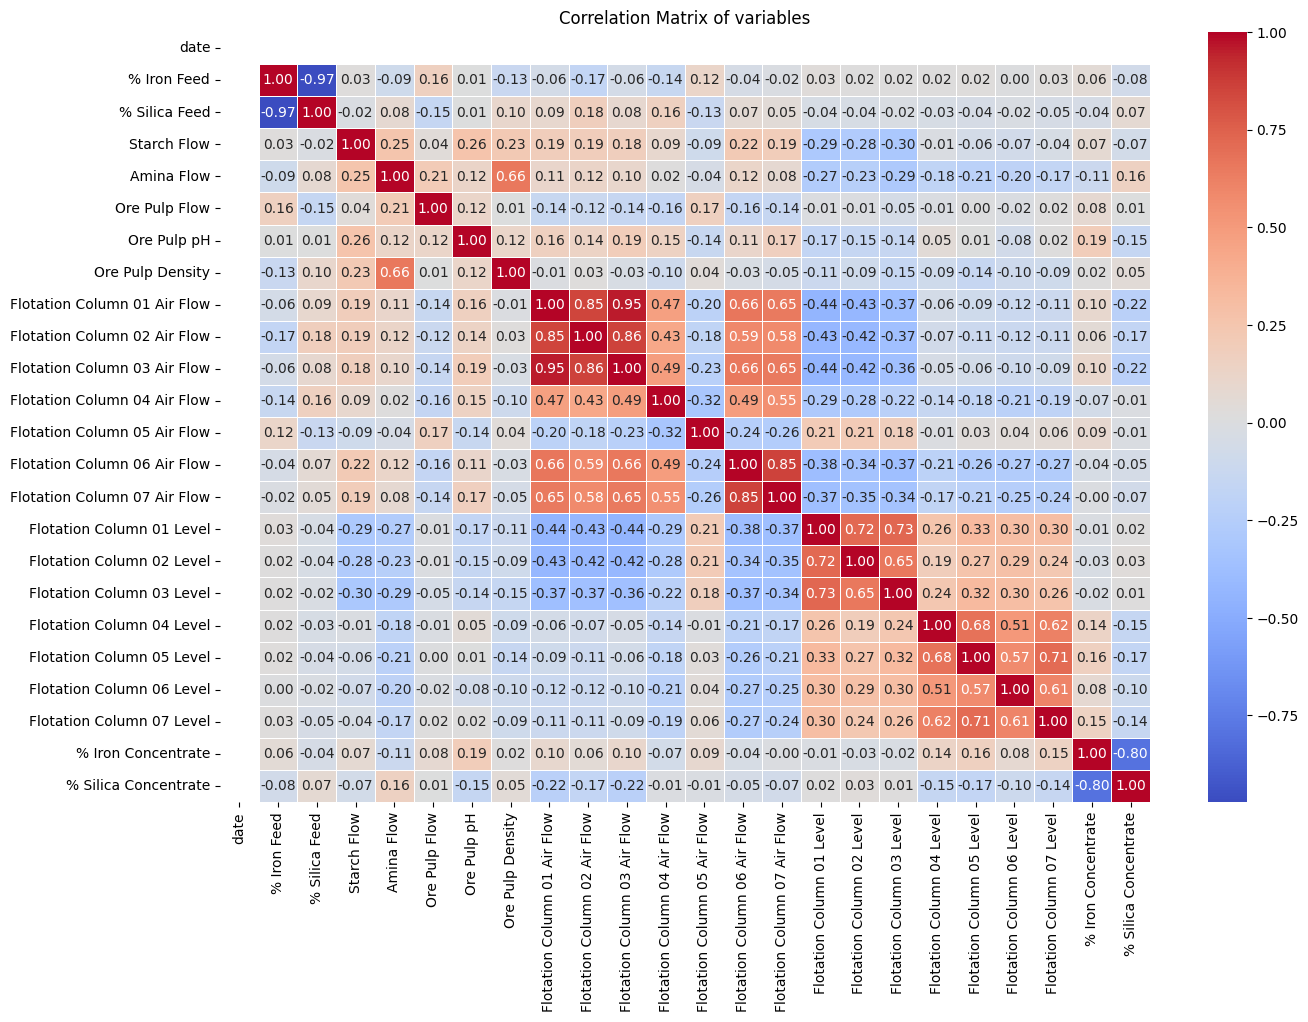


Highly Correlated Columns:
{'% Silica Feed', 'Flotation Column 07 Air Flow', 'Flotation Column 03 Air Flow', '% Silica Concentrate', 'Flotation Column 02 Air Flow'}


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
X = X.drop("const", axis=1, errors="ignore")
correlation_matrix = df3.corr()
# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of variables')
plt.show()

# Identify highly correlated columns (threshold set to 0.7, adjust as needed)
highly_correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            highly_correlated_columns.add(colname)

# Display highly correlated columns
print("\nHighly Correlated Columns:")
print(highly_correlated_columns)

Under the threshold of 80%, % iron feed and % silica feed are highly negative correlative, Flotation Column 02 Air Flow and Flotation Column 03 Air Flow and Flotation Column 04 Air Flow are highly positive correlated, Flotation Column 06 Air Flow and Flotation Column 07 Air Flow are highly positive correlated, % Silica Concentrate and % Iron Concentrate are highly negative correlative.

In [69]:
# Add a constant term to the features (X) for the intercept
x = df3.drop(columns=['% Silica Concentrate','date'])

x_with_const = sm.add_constant(x)
# Fit the linear regression model
model = sm.OLS(y, x_with_const).fit()

# Display the summary table
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     % Silica Concentrate   R-squared:                       0.679
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                 7.103e+04
Date:                  Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                          00:01:42   Log-Likelihood:            -7.1418e+05
No. Observations:                737453   AIC:                         1.428e+06
Df Residuals:                    737430   BIC:                         1.429e+06
Df Model:                            22                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           46.0979      0.155    296.776      0.000      45.793      46.402
% Iron Feed                      0.0256      0.001     40.441      0.000       0.024       0.027
% Silica Feed                    0.0288      0.000     60.547      0.000       0.028       0.030
Starch Flow                  -1.736e-05   6.87e-07    -25.279      0.000   -1.87e-05    -1.6e-05
Amina Flow                       0.0007   1.22e-05     56.078      0.000       0.001       0.001
Ore Pulp Flow                    0.0042   8.57e-05     49.352      0.000       0.004       0.004
Ore Pulp pH                      0.0460      0.002     21.618      0.000       0.042       0.050
Ore Pulp Density                 0.1698      0.015     11.093      0.000       0.140       0.200
Flotation Column 01 Air Flow    -0.0051    8.8e-05    -58.398      0.000      -0.005      -0.005
Flotation Column 02 Air Flow    -0.0014   5.13e-05    -27.686      0.000      -0.002      -0.001
Flotation Column 03 Air Flow    -0.0010   9.66e-05    -10.154      0.000      -0.001      -0.001
Flotation Column 04 Air Flow     0.0023      0.000      6.033      0.000       0.002       0.003
Flotation Column 05 Air Flow     0.0146      0.000     64.821      0.000       0.014       0.015
Flotation Column 06 Air Flow -8.533e-05   5.14e-05     -1.662      0.097      -0.000    1.53e-05
Flotation Column 07 Air Flow     0.0012   5.35e-05     23.069      0.000       0.001       0.001
Flotation Column 01 Level       -0.0003   9.67e-06    -29.498      0.000      -0.000      -0.000
Flotation Column 02 Level       -0.0002    8.9e-06    -17.514      0.000      -0.000      -0.000
Flotation Column 03 Level    -8.726e-05   7.68e-06    -11.363      0.000      -0.000   -7.22e-05
Flotation Column 04 Level       -0.0001   1.16e-05    -11.573      0.000      -0.000      -0.000
Flotation Column 05 Level       -0.0002   1.45e-05    -12.243      0.000      -0.000      -0.000
Flotation Column 06 Level       -0.0002   1.11e-05    -18.450      0.000      -0.000      -0.000
Flotation Column 07 Level        0.0002   1.37e-05     13.895      0.000       0.000       0.000
% Iron Concentrate              -0.7871      0.001  -1100.441      0.000      -0.789      -0.786
==============================================================================
Omnibus:                    13572.629   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20037.918
Skew:                           0.210   Prob(JB):                         0.00
Kurtosis:                       3.690   Cond. No.                     7.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of 

Since % Silica Concentrate and % Iron Concentrate are highly negative correlative, there may exist multicollinearity problem.

(i)

Yes, it is still possible to predict % Silica Concentrate using the % Iron Concentrate column, especially when they are highly correlated. However, this situation can lead to a problem known as collinearity.  
We can address the problem of collinearity by feature engineering, or replace the original variables with the IV(Intrumental Variable). 

## 第三題

(a)

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils import data
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense




In [130]:
df = pd.read_csv('Brent Oil Futures Historical Data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)
# Normalize the "Price" column
df.set_index('Date', inplace=True)
df_time = df.drop(columns=['Open','High','Low','Vol.', 'Change %'])
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price'] = scaler.fit_transform(df[['Price']])
timeseries = df_time[["Price"]].values.astype('float32')



(240, 1, 1)
240/240 [==============================] - 1s 804us/step
(238, 1)


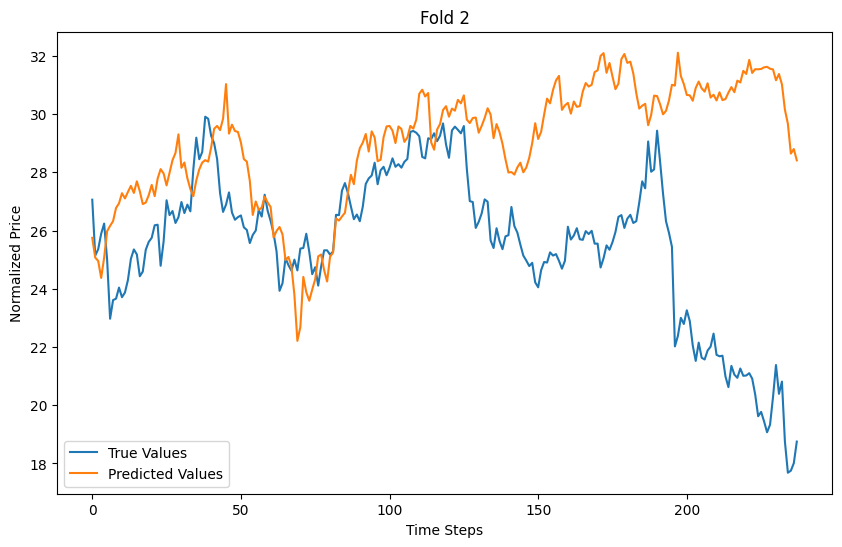

Mean Squared Error: 24.942564010620117

(478, 1, 1)
478/478 [==============================] - 1s 751us/step
(238, 1)


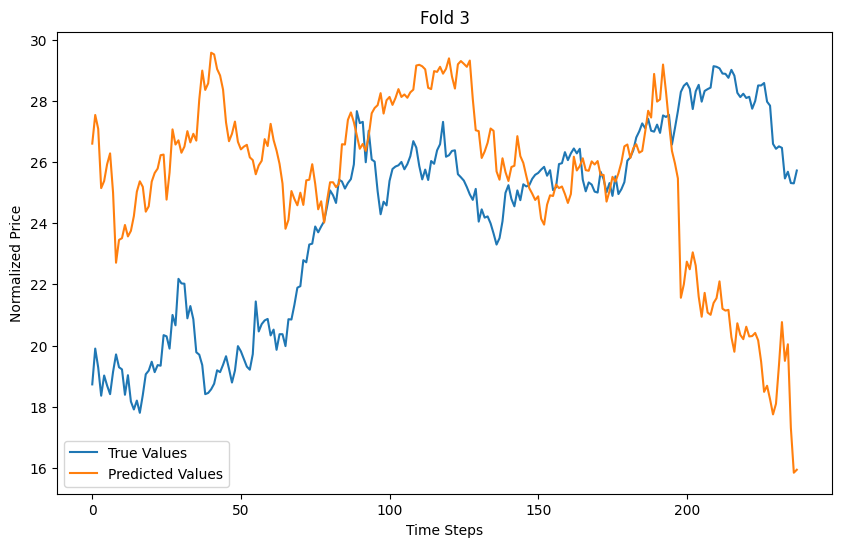

Mean Squared Error: 24.840478897094727

(716, 1, 1)
716/716 [==============================] - 1s 913us/step
(238, 1)


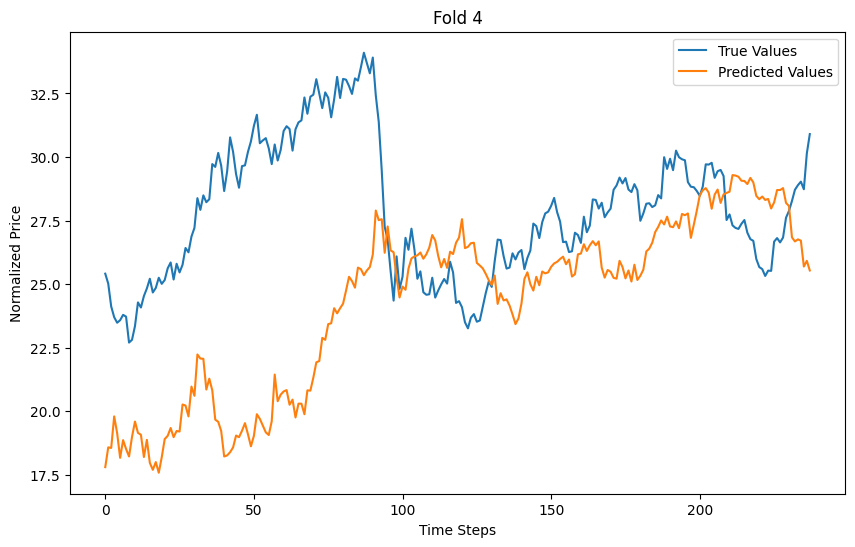

Mean Squared Error: 31.649011611938477

(954, 1, 1)
954/954 [==============================] - 1s 651us/step
(238, 1)


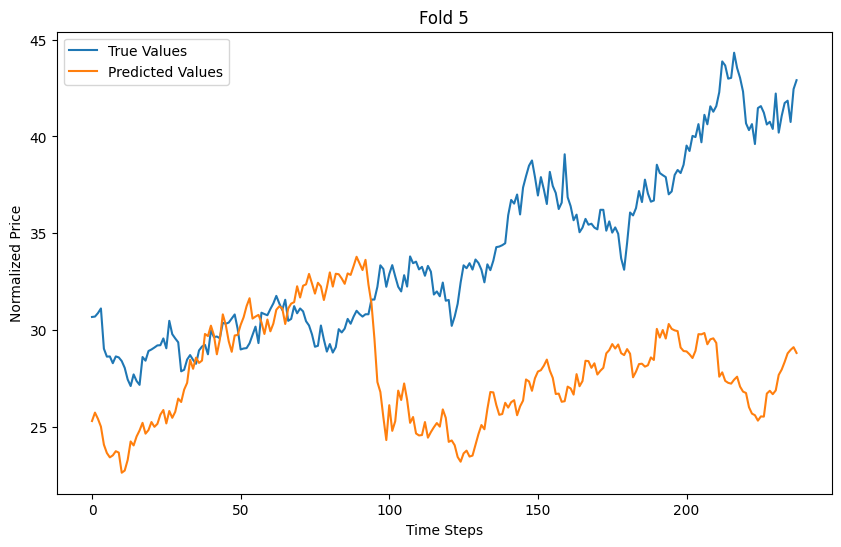

Mean Squared Error: 64.26432800292969

(1192, 1, 1)
1192/1192 [==============================] - 1s 758us/step
(238, 1)


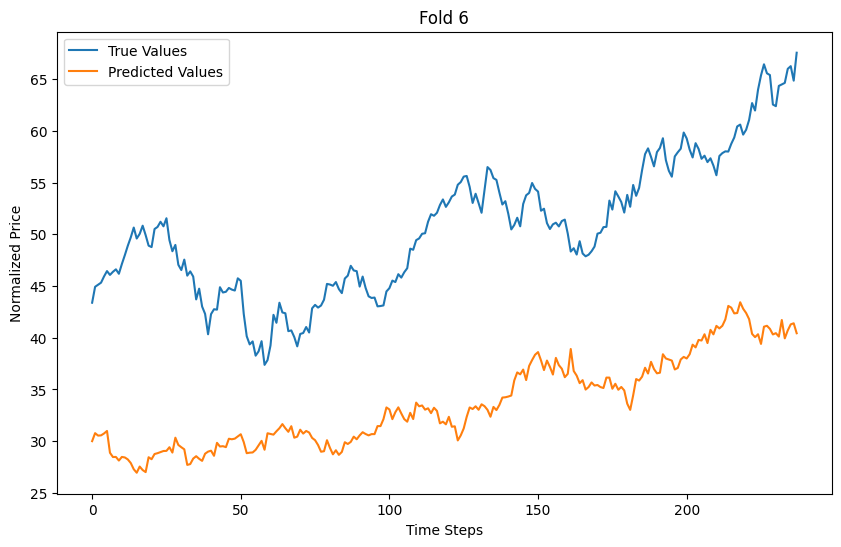

Mean Squared Error: 304.45672607421875

(1430, 1, 1)
1430/1430 [==============================] - 1s 677us/step
(238, 1)


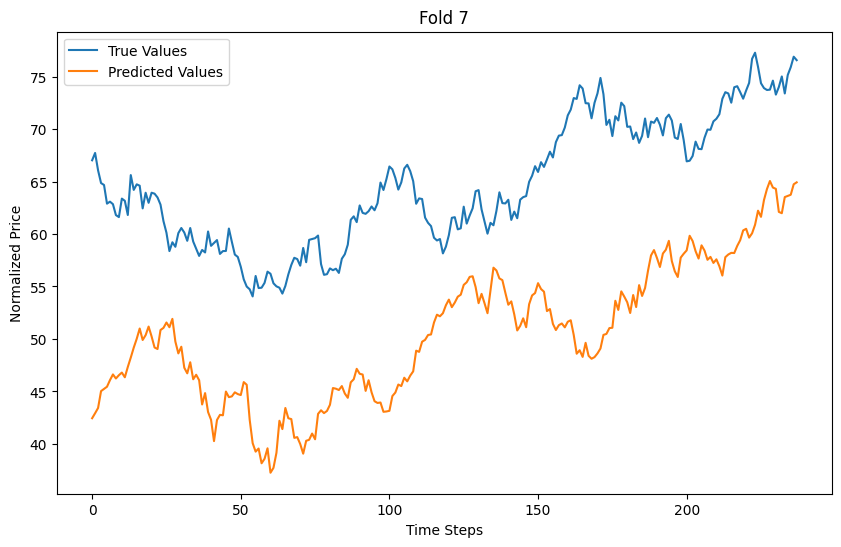

Mean Squared Error: 222.25189208984375

(1668, 1, 1)
1668/1668 [==============================] - 2s 757us/step
(238, 1)


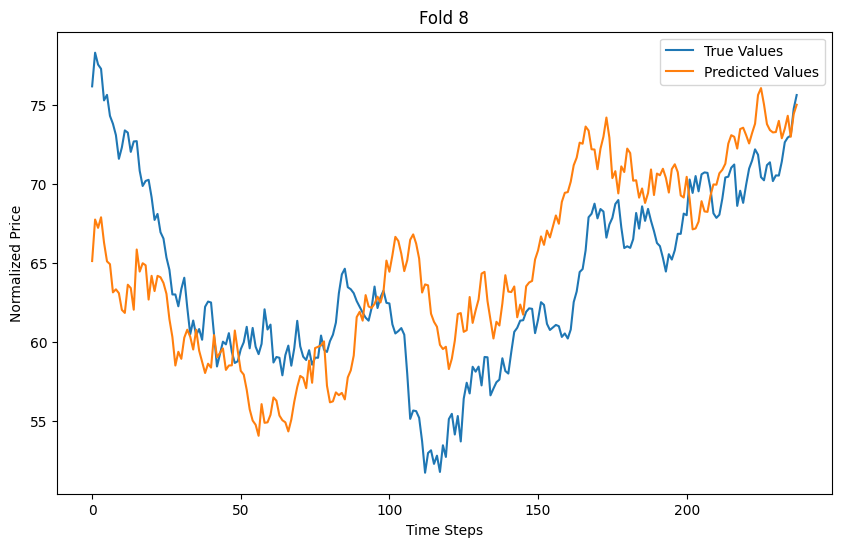

Mean Squared Error: 26.48120880126953

(1906, 1, 1)
1906/1906 [==============================] - 2s 756us/step
(238, 1)


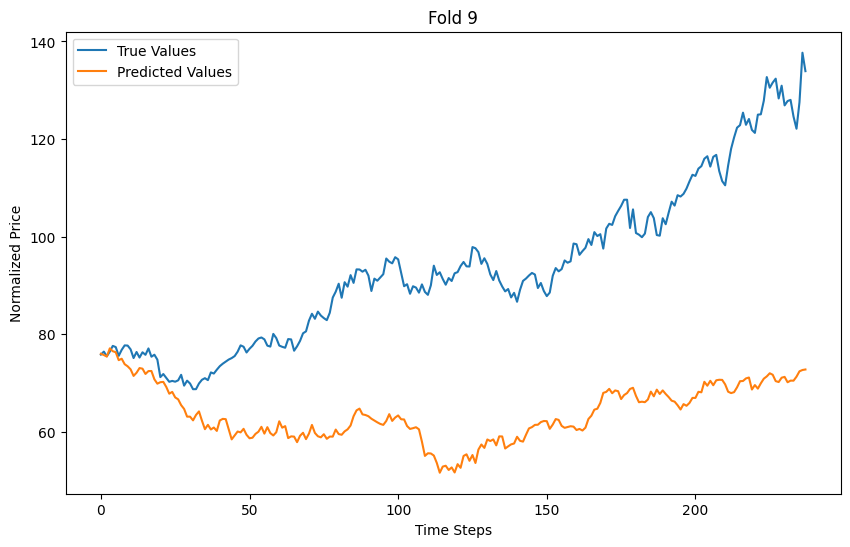

Mean Squared Error: 1119.2310791015625

(2144, 1, 1)
2144/2144 [==============================] - 3s 1ms/step
(238, 1)


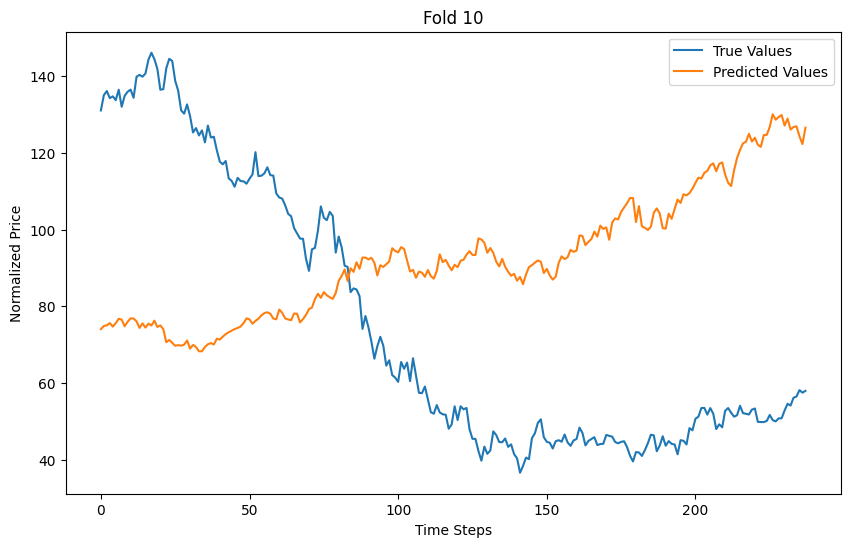

Mean Squared Error: 2637.3330078125

(2382, 1, 1)
2382/2382 [==============================] - 3s 1ms/step
(238, 1)


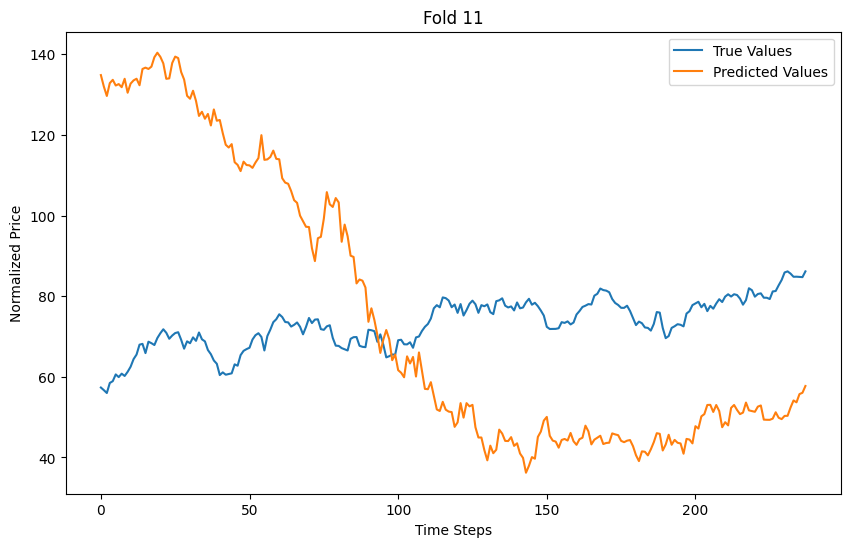

Mean Squared Error: 1563.7742919921875

(2620, 1, 1)
2620/2620 [==============================] - 3s 1ms/step
(238, 1)


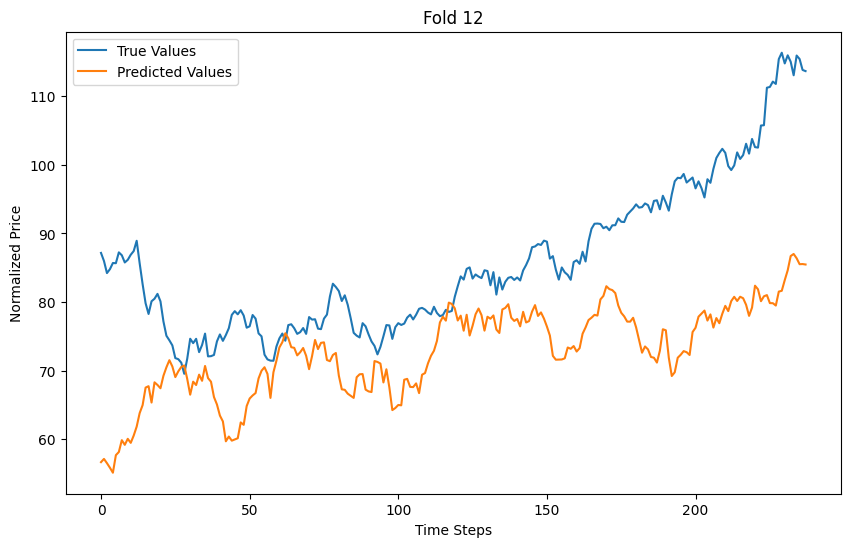

Mean Squared Error: 251.03456115722656

(2858, 1, 1)
2858/2858 [==============================] - 3s 1ms/step
(238, 1)


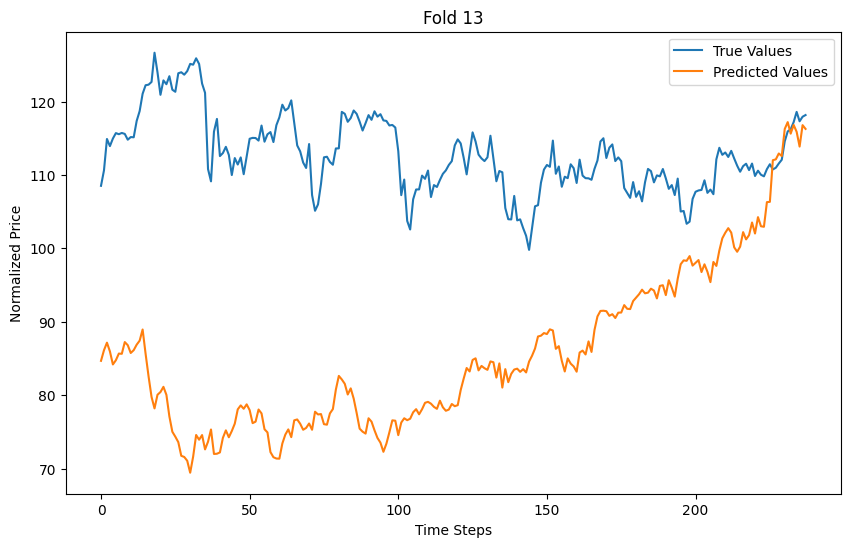

Mean Squared Error: 916.371826171875

(3096, 1, 1)
3096/3096 [==============================] - 4s 1ms/step
(238, 1)


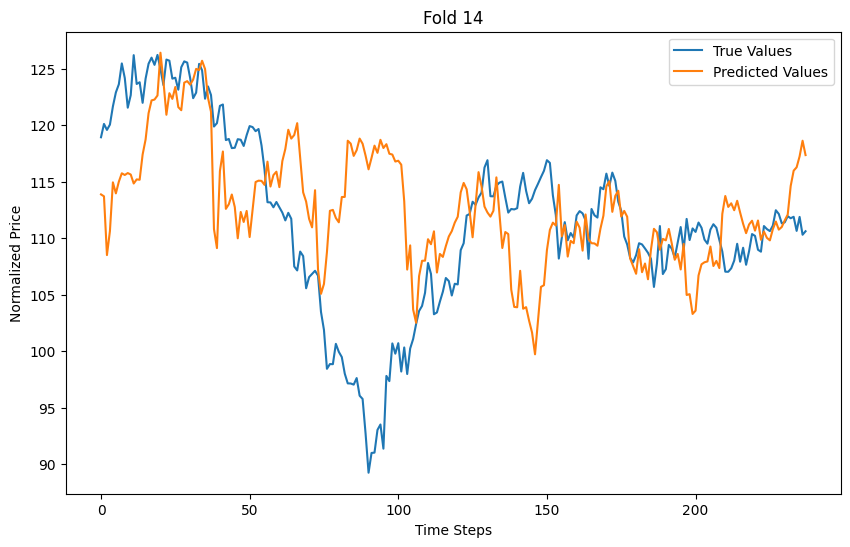

Mean Squared Error: 69.04560089111328

(3334, 1, 1)
3334/3334 [==============================] - 4s 1ms/step
(238, 1)


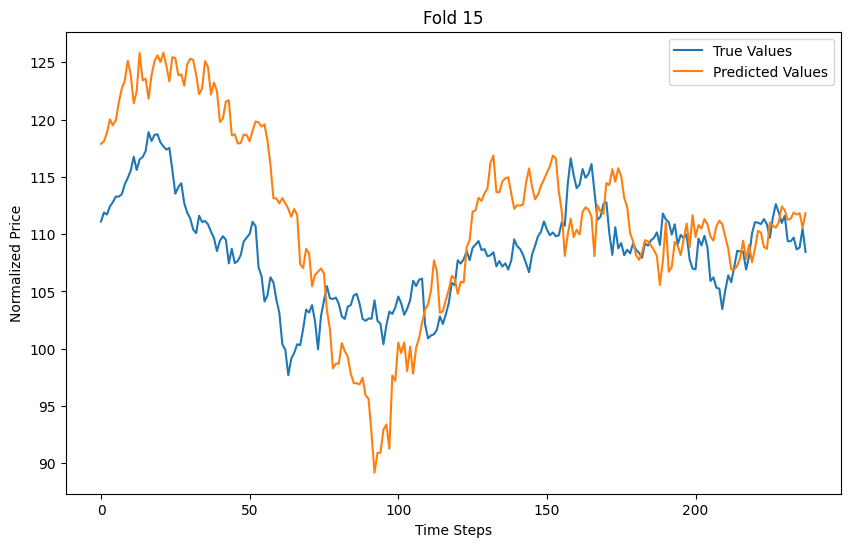

Mean Squared Error: 45.571720123291016

(3572, 1, 1)
3572/3572 [==============================] - 14s 4ms/step
(238, 1)


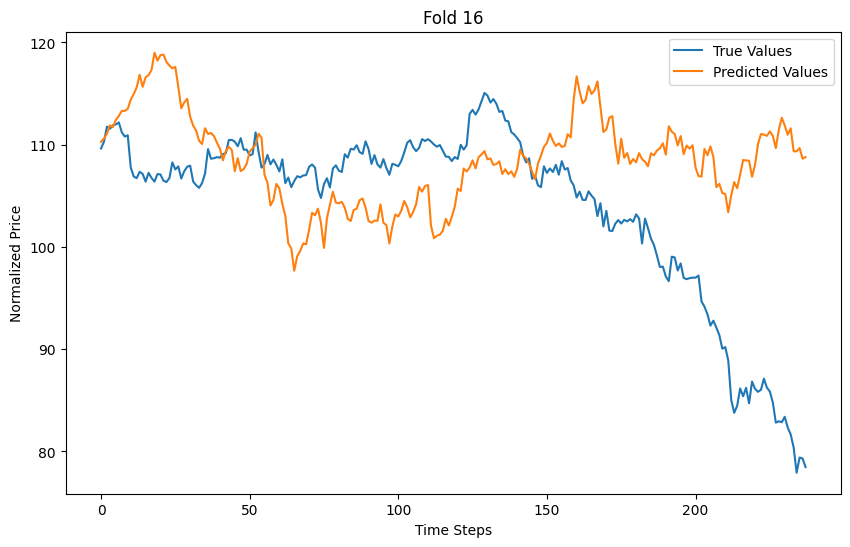

Mean Squared Error: 120.94559478759766

(3810, 1, 1)
3810/3810 [==============================] - 5s 1ms/step
(238, 1)


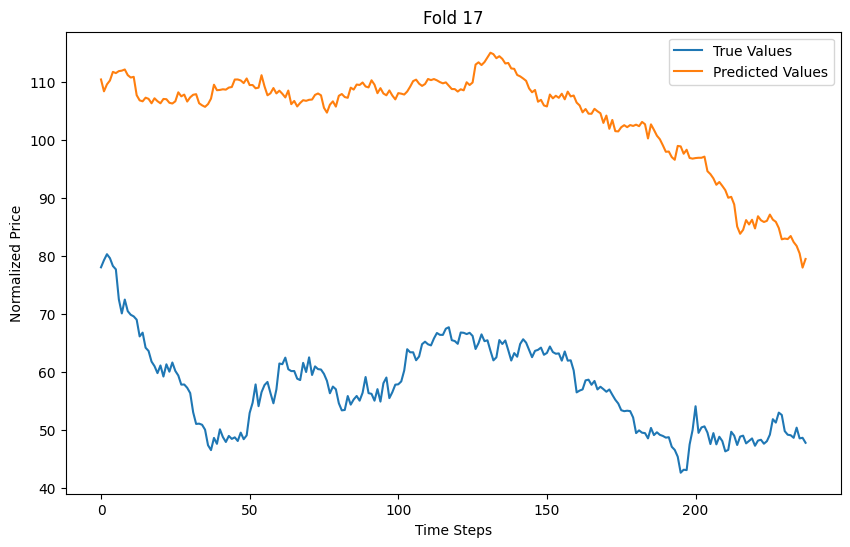

Mean Squared Error: 2239.975830078125

(4048, 1, 1)
4048/4048 [==============================] - 16s 4ms/step
(238, 1)


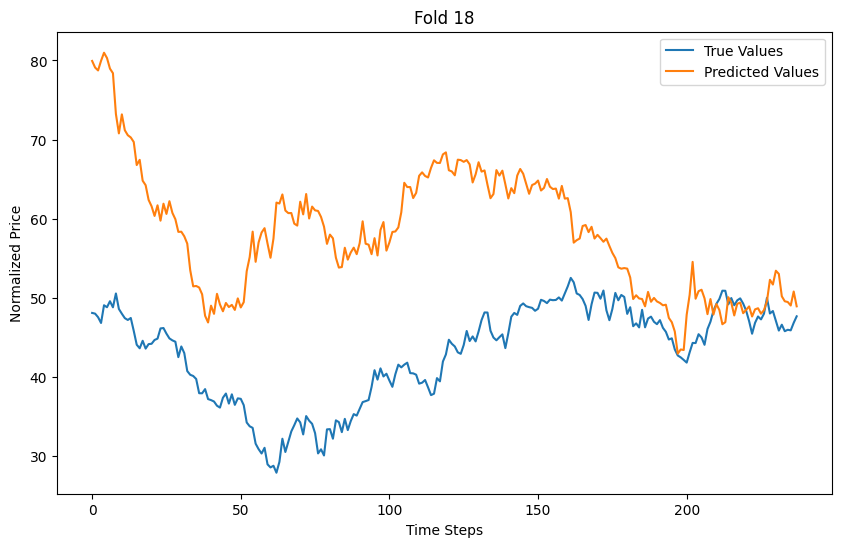

Mean Squared Error: 319.7085266113281

(4286, 1, 1)
4286/4286 [==============================] - 16s 3ms/step
(238, 1)


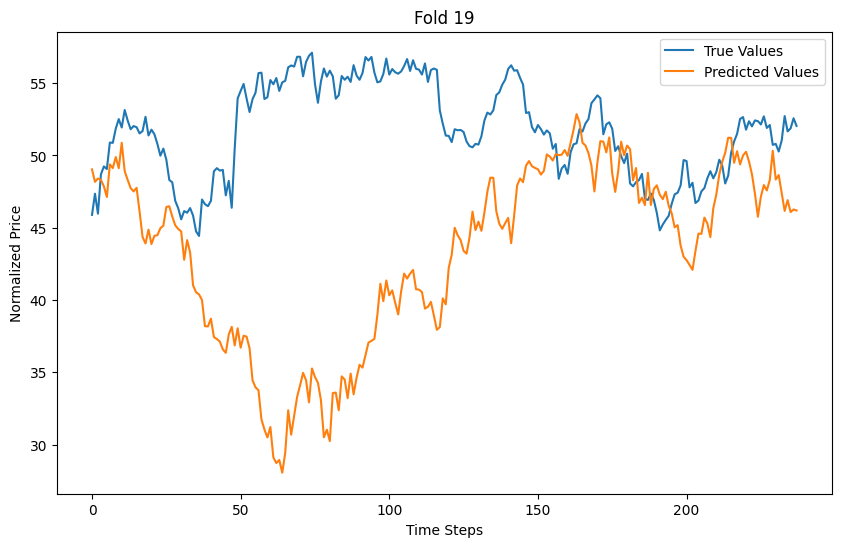

Mean Squared Error: 137.57032775878906

(4524, 1, 1)
4524/4524 [==============================] - 6s 1ms/step
(238, 1)


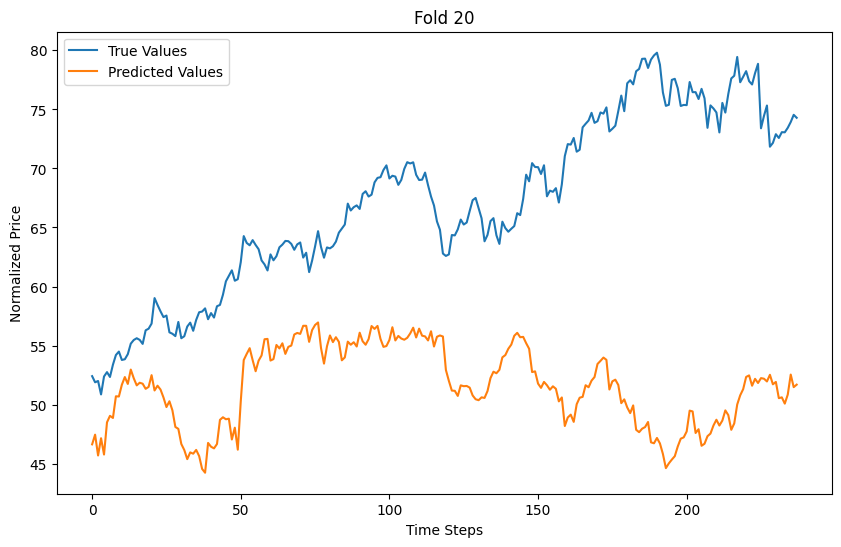

Mean Squared Error: 309.2086486816406

(4762, 1, 1)
4762/4762 [==============================] - 6s 1ms/step
(238, 1)


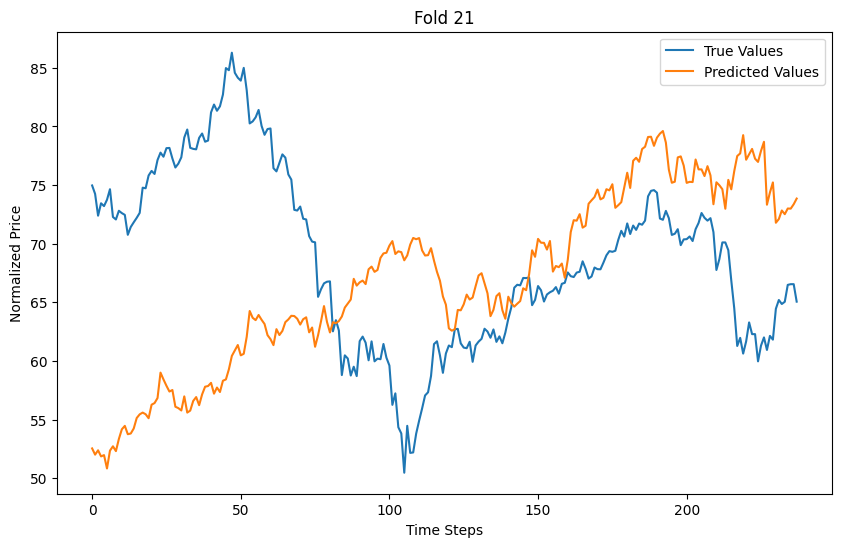

Mean Squared Error: 160.578369140625



In [144]:

# Number of folds
n_folds = 20

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_folds)

# LSTM Model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
predicted_prices = []
step = 0
i = 1
# Iterate through folds
for train_index, test_index in tscv.split(timeseries):
    
    # Split the data into train and test sets
    X_train, X_test = timeseries[train_index], timeseries[test_index]

    # The true values for the test set
    y_true = timeseries[test_index]

    # Reshape the data for LSTM input (samples, time steps, features)
    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

    # Create LSTM model
    if i == 1:
        model = create_lstm_model((1, X_train.shape[2]))

    # Train the model on the current training set
    model.fit(X_train, X_train, epochs=50, batch_size=4, verbose=0)  
    # Predict on the current test set
    # print(X_train.shape)
    y_pred = model.predict(X_train, batch_size=1)[step:step+len(y_true)]
    step +=len(y_true)
    # print(y_pred.shape)
    predicted_prices.extend(y_pred.flatten())

    # Plot the true and predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label='True Values')
    plt.plot(y_pred.flatten(), label='Predicted Values')
    plt.title(f"Fold {i+1}")
    plt.xlabel("Time Steps")
    plt.ylabel("Normalized Price")
    plt.legend()
    plt.show()
    i+=1
    # Print the mean squared error
    mse = mean_squared_error(y_true, y_pred)
    print(f"Mean Squared Error: {mse}\n")


show the prediction results

In [145]:
print(predicted_prices)

[25.749722, 25.070835, 24.953707, 24.37316, 25.070835, 25.97683, 26.160795, 26.322645, 26.774792, 26.935627, 27.283113, 27.102371, 27.325603, 27.534933, 27.291628, 27.690588, 27.350996, 26.90902, 26.96216, 27.214697, 27.567947, 27.180294, 27.787395, 28.109499, 27.961878, 27.551455, 27.993189, 28.418533, 28.665203, 29.303791, 28.15553, 28.33689, 27.795412, 27.42672, 27.180294, 27.722986, 28.1018, 28.33689, 28.418533, 28.366686, 28.855034, 29.49478, 29.594208, 29.450754, 29.841457, 31.030718, 29.329605, 29.63718, 29.419107, 29.38729, 29.026146, 28.455349, 28.366686, 27.706802, 26.537512, 26.997417, 26.711494, 26.78381, 27.163033, 26.96216, 26.810776, 25.7597, 25.98659, 26.122341, 25.868818, 24.985762, 25.092005, 24.770424, 23.788893, 22.210293, 22.683163, 24.406736, 23.882221, 23.588497, 23.974915, 24.328245, 25.11314, 25.176315, 24.639385, 24.249271, 25.102575, 25.239159, 26.416647, 26.341522, 26.481915, 26.611155, 27.30863, 27.914675, 27.592619, 28.396364, 28.827242, 29.019384, 29.3167

(b)

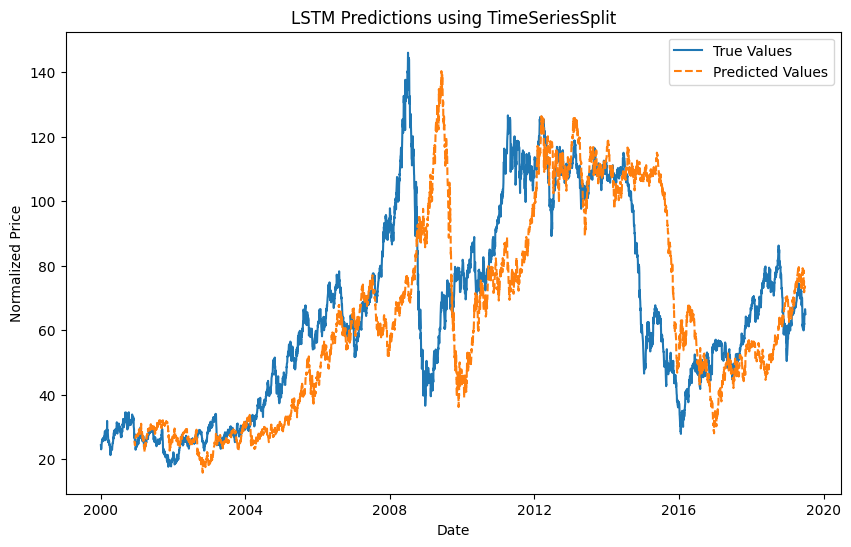

In [147]:
predicted_prices = np.array(predicted_prices)

plt.figure(figsize=(10, 6))
plt.plot(df.index[:len(timeseries)], timeseries, label='True Values')  # Adjust the index to match the length of timeseries
plt.plot(df.index[238:238+len(predicted_prices)], predicted_prices, label='Predicted Values', linestyle='--')  # Adjust the index to start from day 835
plt.title("LSTM Predictions using TimeSeriesSplit")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()